In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def lorenz(t, state, sigma, beta, r):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def simulate_lorenz(sigma, beta, r, initial_state, t_span=(0, 100), dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(
        lorenz, t_span, initial_state, args=(sigma, beta, r),
        t_eval=t_eval, rtol=1e-8, atol=1e-10
    )
    return sol.t, sol.y

def plot_lorenz(r):
    sigma = 10.0
    beta = 8.0 / 3.0
    initial_state = [1.0, 1.0, 1.0]
    # Increase simulation end time
    t, states = simulate_lorenz(sigma, beta, r, initial_state, t_span=(0, 200))
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(states[0], states[1], states[2])
    ax.set_title(f"Lorenz System (σ={sigma}, β={beta}, r={r:.2f})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    # Fix axis limits for consistency
    ax.set_xlim([-25, 25])
    ax.set_ylim([-10, 35])
    ax.set_zlim([0, 30])
    plt.show()

interact(plot_lorenz, r=FloatSlider(min=5, max=100, step=1, value=5))

interactive(children=(FloatSlider(value=5.0, description='r', max=20.0, min=5.0, step=1.0), Output()), _dom_cl…

<function __main__.plot_lorenz(r)>

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def lorenz(t, state, sigma, beta, r):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def simulate_lorenz(sigma, beta, r, initial_state, t_span=(0, 10), dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(
        lorenz, t_span, initial_state, args=(sigma, beta, r),
        t_eval=t_eval, rtol=1e-8, atol=1e-10
    )
    return sol.t, sol.y

def plot_lorenz(r):
    sigma = 10.0
    beta = 8.0 / 3.0
    initial_state1 = [1.0, 1.0, 1.0]
    initial_state2 = [-1.0, -1.0, -1.0]  # Slightly different initial condition

    t1, states1 = simulate_lorenz(sigma, beta, r, initial_state1, t_span=(0, 200))
    t2, states2 = simulate_lorenz(sigma, beta, r, initial_state2, t_span=(0, 200))

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(states1[0], states1[1], states1[2], color='mediumpurple', label='Initial: [1.0, 1.0, 1.0]')
    ax.plot(states2[0], states2[1], states2[2], color='lightseagreen', label='Initial: [-1.0, -1.0, -1.0]')
    ax.set_title(f"Lorenz System (σ={sigma}, β={beta}, r={r:.2f})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-50, 50])
    ax.set_ylim([-50, 50])
    ax.set_zlim([0, 100])
    ax.legend()
    plt.show()

interact(plot_lorenz, r=FloatSlider(min=5, max=100, step=1, value=5))

interactive(children=(FloatSlider(value=5.0, description='r', min=5.0, step=1.0), Output()), _dom_classes=('wi…

<function __main__.plot_lorenz(r)>

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import torch
import os

def lorenz(t, state, sigma, beta, r):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def simulate_lorenz(sigma, beta, r, initial_state, t_span=(0, 40), dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(
        lorenz, t_span, initial_state, args=(sigma, beta, r),
        t_eval=t_eval, rtol=1e-8, atol=1e-10
    )
    return sol.t, sol.y

def save_trajectory_plot(states, t, r, initial_state, save_dir, idx_traj):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(states[0], states[1], states[2])
    ax.set_title(f"Lorenz (r={r}, init={initial_state})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-25, 25])
    ax.set_ylim([-20, 30])
    ax.set_zlim([0, 40])
    plt.tight_layout()
    fname = f"lorenz_traj{idx_traj}_r{r}_init{initial_state}.png"
    plt.savefig(os.path.join(save_dir, fname))
    plt.close(fig)

def generate_lorenz_data(r_list, initial_conditions, t_span=(0, 40), dt=0.01, sigma=10.0, beta=8/3):
    save_dir = "lorenz_trajectories"
    os.makedirs(save_dir, exist_ok=True)
    num_r = len(r_list)
    num_init = len(initial_conditions)
    t_eval = np.arange(t_span[0], t_span[1], dt)
    num_timesteps = len(t_eval)
    num_trajectories = num_r * num_init
    data = torch.zeros((num_timesteps, num_trajectories, 3), dtype=torch.float32)

    idx = 0
    for i, r in enumerate(r_list):
        for j, init in enumerate(initial_conditions):
            t, states = simulate_lorenz(sigma, beta, r, init, t_span, dt)
            # states shape: (3, T) -> transpose to (T, 3)
            data[:, idx, :] = torch.tensor(states.T, dtype=torch.float32)
            save_trajectory_plot(states, t, r, init, save_dir, idx)
            idx += 1
    return data

if __name__ == "__main__":
    r_list = [5,7.5,10,12.5,15,17.5,20,22.5, 25, 27.5]  # Example r values
    initial_conditions = [
        [1.0, 1.0, 1.0],
        [-1.0, -1.0, 1.0]
    ]
    data = generate_lorenz_data(r_list, initial_conditions, t_span=(0, 40), dt=0.01)
    
    data = data[::20, :, :]  # Downsample to every 20th timestep

    torch.save(data[::20,:,:], "lorenz_data.pt")
    print(f"Saved data tensor of shape {data.shape} and trajectory images in 'lorenz_trajectories/'")

    # Also save a tensor which contains the r values, repeated for each initial condition
    r_tensor = torch.tensor(r_list, dtype=torch.float32).repeat_interleave(len(initial_conditions))
    torch.save(r_tensor, "lorenz_r_values.pt")

Saved data tensor of shape torch.Size([200, 20, 3]) and trajectory images in 'lorenz_trajectories/'


In [8]:
import torch

# Load data and r values
dataname=f"lorenz_dataset.pth"

data_all = torch.load(dataname)
data = (data_all["data"]).float()
r_tensor = (data_all["r_tensor"]).float()
print(data.shape)

# Find indices for r <= 22.5
mask = r_tensor <= 22.5

selected_data = data[:, mask.squeeze(), :]  # shape: (timesteps, selected_trajectories, 3)
selected_r = r_tensor[mask]       # shape: (selected_trajectories,)

# Compute mean and std for x, y, z over all selected trajectories and timesteps
xyz_mean = selected_data.reshape(-1, 3).mean(dim=0)
xyz_std = selected_data.reshape(-1, 3).std(dim=0)

# Compute mean and std for r
r_mean = selected_r.mean()
r_std = selected_r.std()

# Normalize all data
data_norm = (data - xyz_mean) / xyz_std
r_tensor_norm = (r_tensor - r_mean) / r_std

# Save normalized data in the same format as loaded
data_all_normalized = {
    "data": data_norm,
    "r_tensor": r_tensor_norm,
    "data_t": data_all["data_t"]
}
torch.save(data_all_normalized, "lorenz_dataset_normalized.pth")

print("Normalization complete.")
print(f"x, y, z mean: {xyz_mean.tolist()}, std: {xyz_std.tolist()}")
print(f"r mean: {r_mean.item()}, std: {r_std.item()}")
# Save normalization statistics for later use
norm_stats = {
    "xyz_mean": xyz_mean,
    "xyz_std": xyz_std,
    "r_mean": r_mean,
    "r_std": r_std
}
torch.save(norm_stats, "lorenz_normalization_stats.pth")
print("Normalization statistics saved to 'lorenz_normalization_stats.pth'.")


torch.Size([50, 20, 3])
Normalization complete.
x, y, z mean: [0.0, 0.0, 13.27048110961914], std: [6.065565586090088, 6.2227373123168945, 7.617894649505615]
r mean: 13.75, std: 5.916079998016357
Normalization statistics saved to 'lorenz_normalization_stats.pth'.


C:\Users\tegel009\AppData\Local\Temp\ipykernel_8032\1053773345.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_all = torch.load(dataname)


C:\Users\tegel009\AppData\Local\Temp\ipykernel_8032\962160592.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_norm = torch.load("lorenz_data_normalized.pt")  # (tim

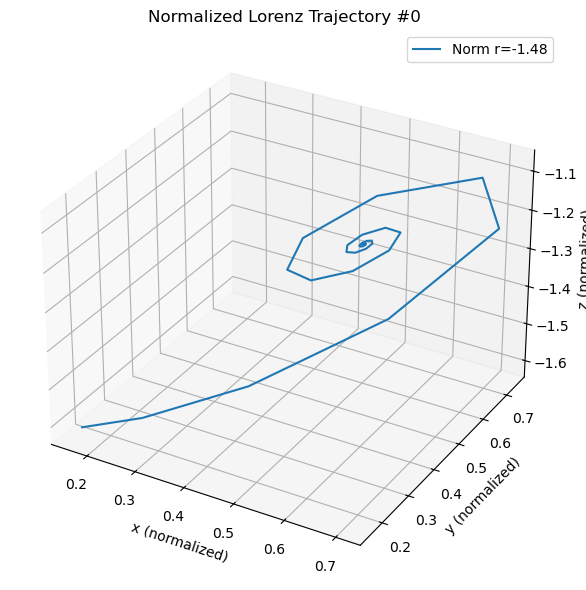

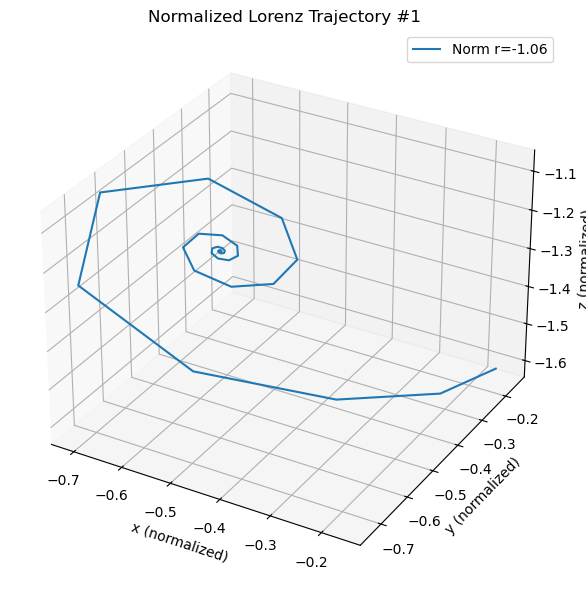

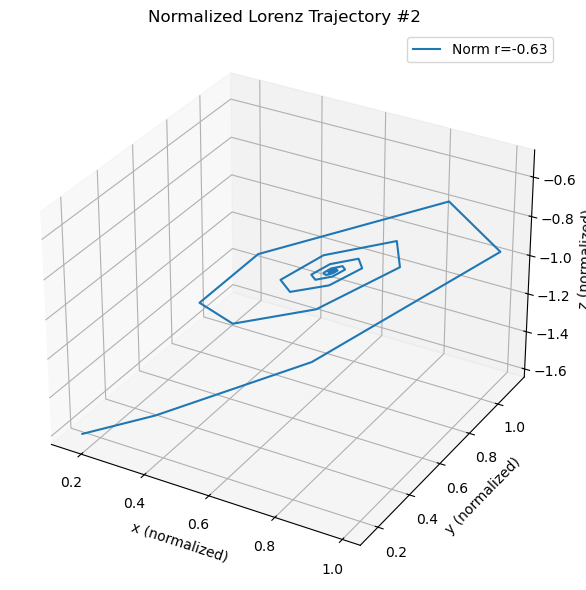

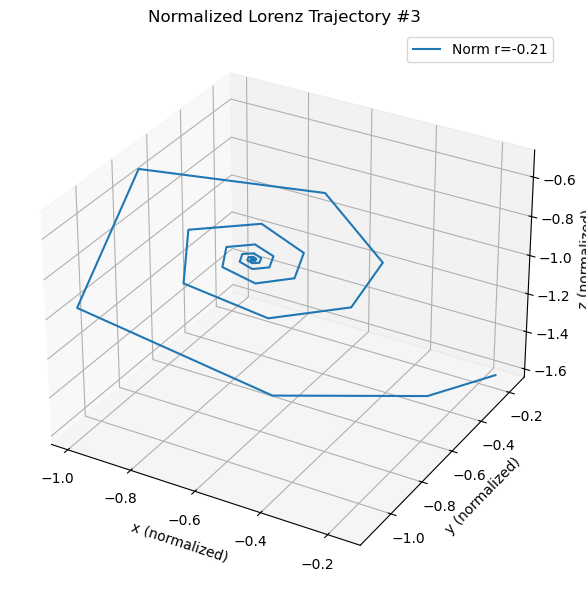

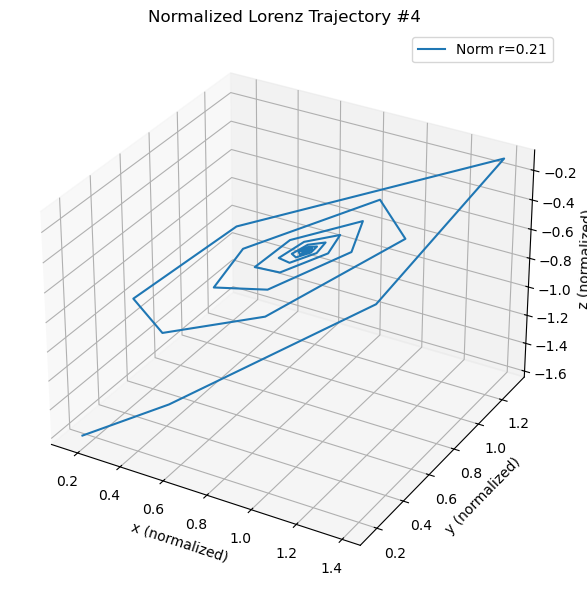

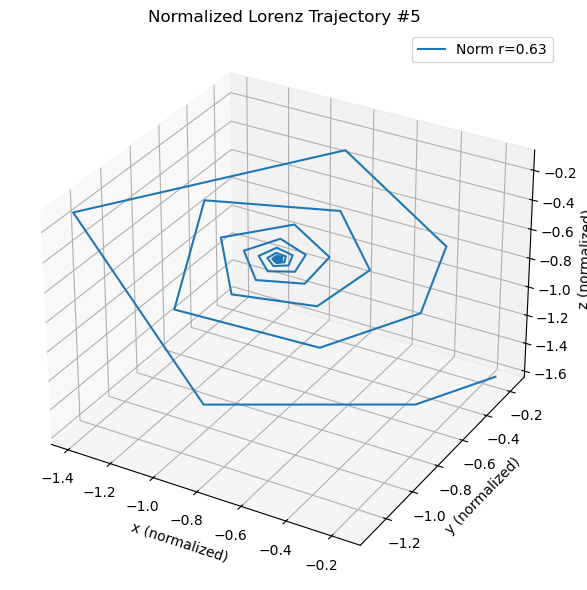

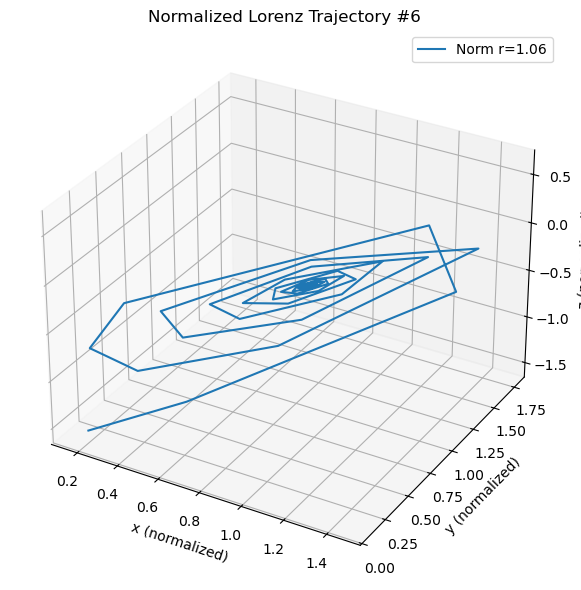

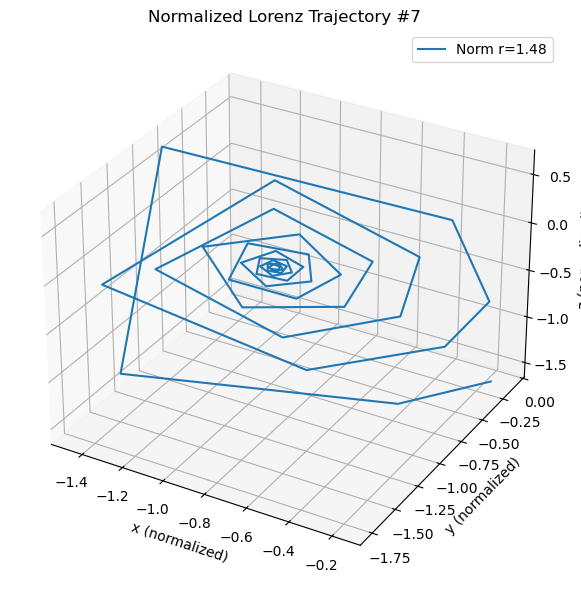

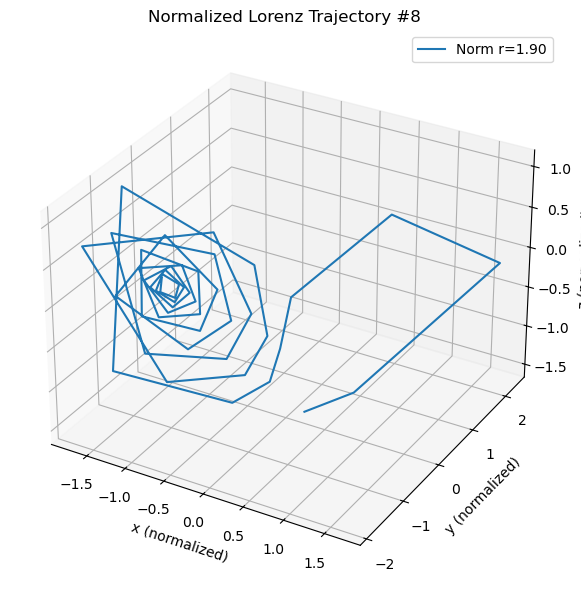

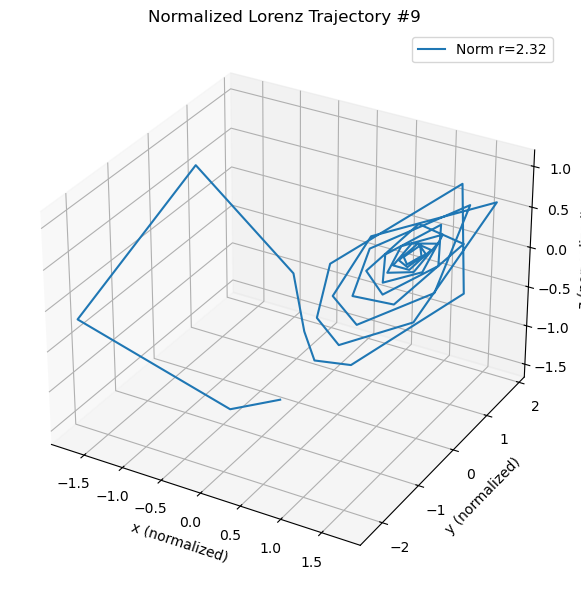

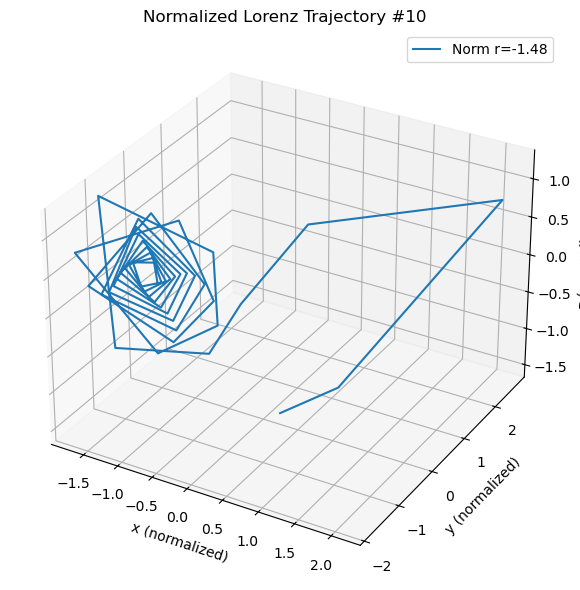

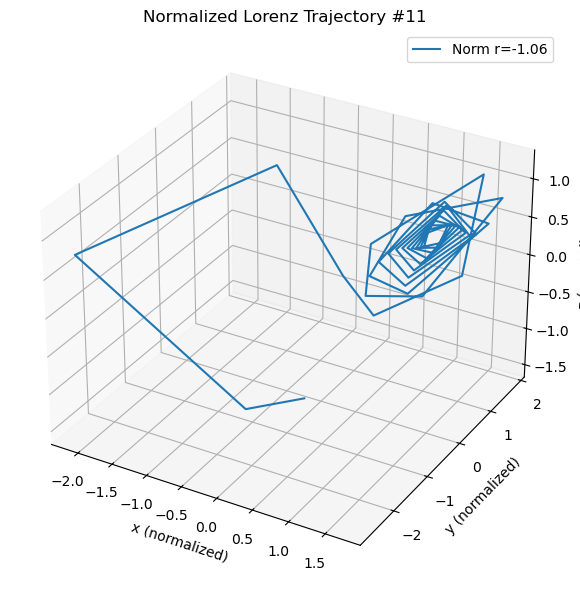

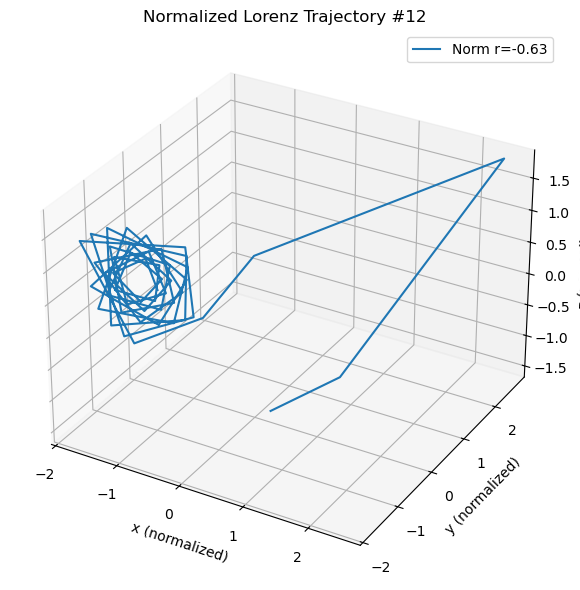

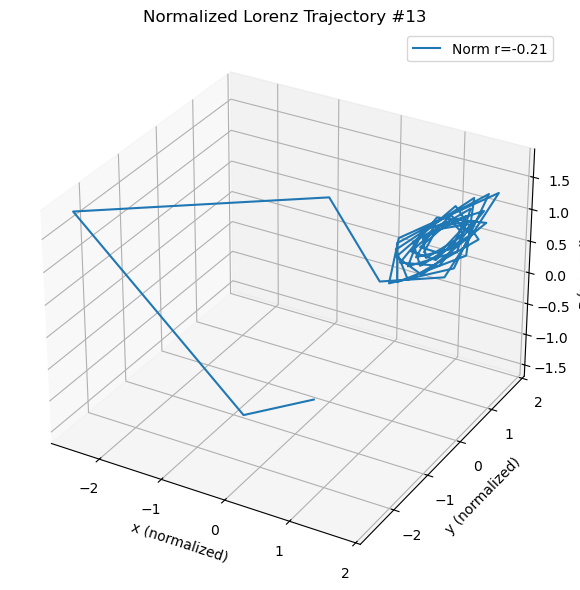

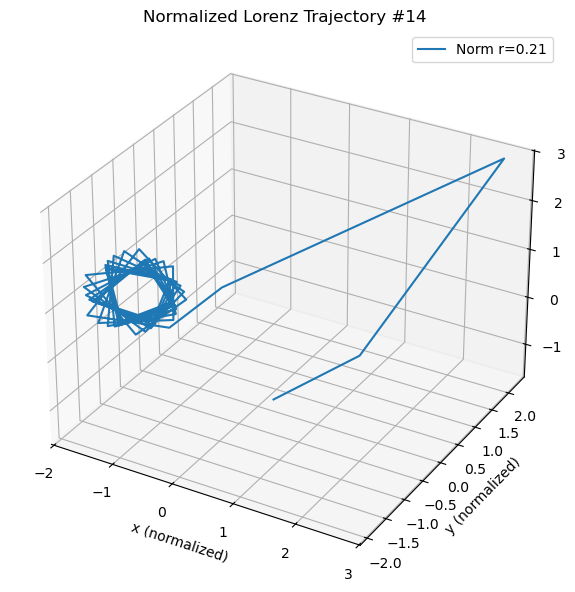

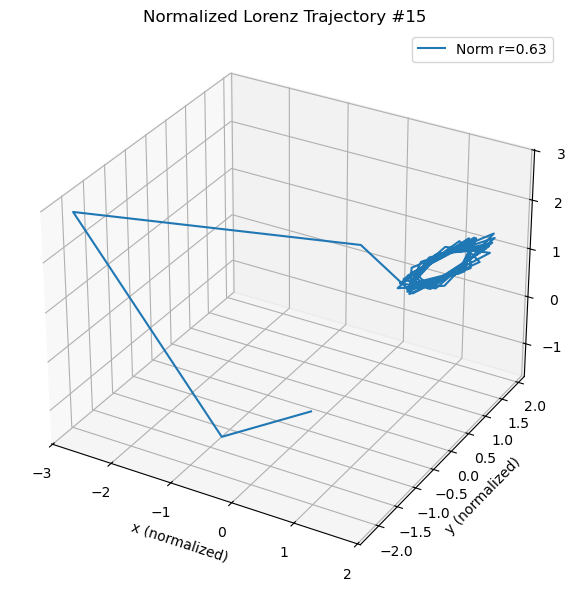

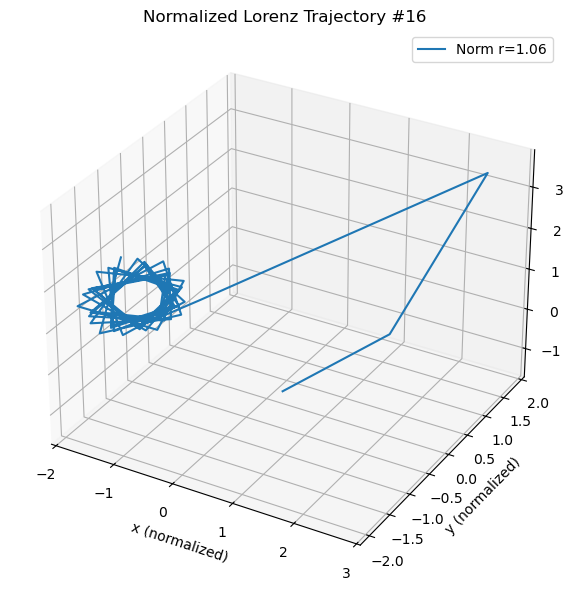

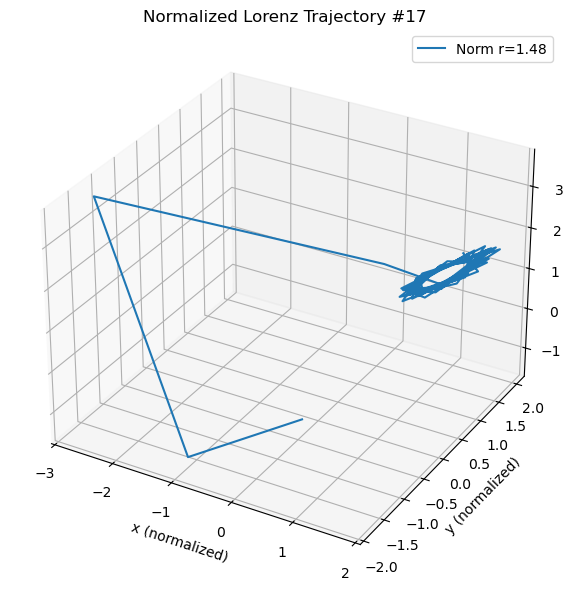

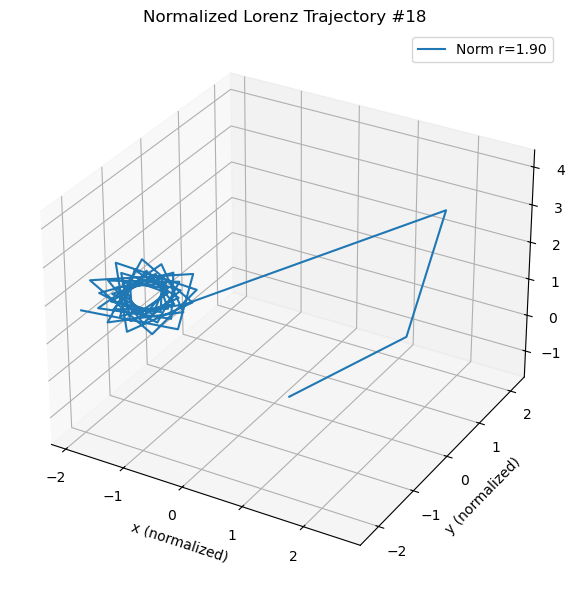

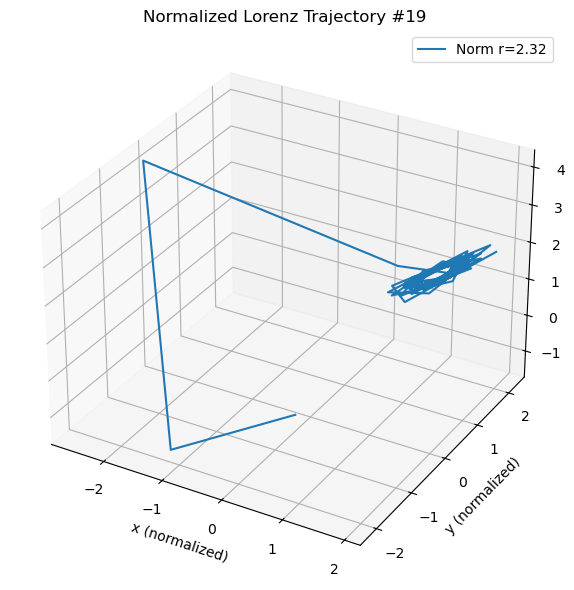

In [9]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load normalized data
data_norm = torch.load("lorenz_data_normalized.pt")  # (timesteps, trajectories, 3)
r_tensor_norm = torch.load("lorenz_r_values_normalized.pt")  # (trajectories,)

timesteps, num_trajectories, _ = data_norm.shape

for idx in range(num_trajectories):
    traj = data_norm[:, idx, :]  # shape: (timesteps, 3)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label=f"Norm r={r_tensor_norm[idx].item():.2f}")
    ax.set_title(f"Normalized Lorenz Trajectory #{idx}")
    ax.set_xlabel("x (normalized)")
    ax.set_ylabel("y (normalized)")
    ax.set_zlabel("z (normalized)")
    ax.legend()
    plt.tight_layout()
    plt.show()